# Linear Regression Multiple Ways

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

In [2]:
coef

array(80.88336208)

In [3]:
X.shape, y.shape

((100, 1), (100,))

In [5]:
X

array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

In [6]:
X.flatten()

array([ 0.03225343, -0.43717257, -0.14039799, -0.28942671, -1.43048995,
       -0.86109055, -0.95908022, -0.52824237, -0.18007786,  1.81894788,
       -1.50157469,  1.07524045, -0.53757079, -0.33654744, -0.69333384,
        0.18613021, -0.35285906, -0.59573347, -0.95284841,  1.37214258,
       -1.00148098,  0.59405599,  1.98893004, -0.84764818,  0.21276995,
       -0.86352344, -0.44574656, -1.08669572,  0.88578638, -0.39457786,
       -0.75808346,  0.21445342, -0.91772873,  1.18192126, -1.23456807,
        1.51028721,  0.36908201,  0.07800759,  0.92827925,  0.91180261,
        0.50541435,  0.39476163, -1.40727442,  1.33682587,  0.28914398,
        0.10784411, -0.48610801, -1.01412413, -0.99058644, -0.81726253,
        1.19533418,  1.39334529, -0.55307527,  1.31181742, -0.20875222,
        0.02615138,  0.03133165, -0.85845574, -0.09592554,  0.57347598,
        0.88361674, -0.27481173, -0.89590558, -1.02294529,  1.44454617,
        0.74268098, -0.55325354,  0.46630994,  0.81253433, -0.38

In [7]:
x = X.flatten()
Y = y.reshape(-1,1)
x.shape, Y.shape

((100,), (100, 1))

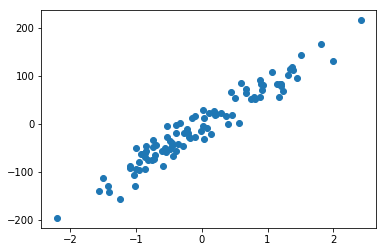

In [8]:
plt.plot(X,Y, 'o');

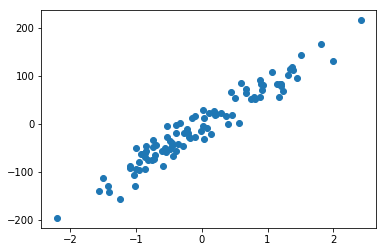

In [9]:
plt.plot(x,y, 'o');

In [10]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

## Fit using sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670303)

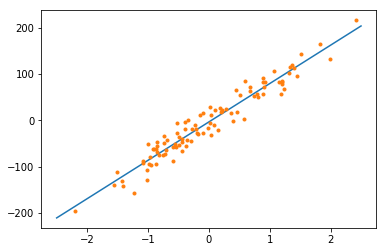

In [15]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, Y, '.')

In [16]:
from sklearn.metrics import r2_score

In [18]:
ypred = lr.predict(X)

In [19]:
r2_score(y, ypred)

0.9342344891672815

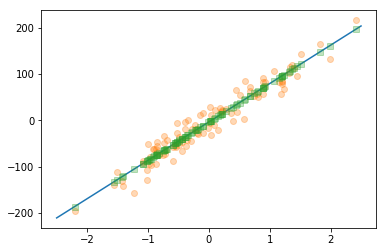

In [21]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, Y, 'o', alpha=0.3)
plt.plot(x, ypred, 's', alpha=0.3)

## Fit using statsmodels

In [23]:
import statsmodels.api as sm
X_aug = sm.add_constant(X)
X_aug

array([[ 1.        ,  0.03225343],
       [ 1.        , -0.43717257],
       [ 1.        , -0.14039799],
       [ 1.        , -0.28942671],
       [ 1.        , -1.43048995],
       [ 1.        , -0.86109055],
       [ 1.        , -0.95908022],
       [ 1.        , -0.52824237],
       [ 1.        , -0.18007786],
       [ 1.        ,  1.81894788],
       [ 1.        , -1.50157469],
       [ 1.        ,  1.07524045],
       [ 1.        , -0.53757079],
       [ 1.        , -0.33654744],
       [ 1.        , -0.69333384],
       [ 1.        ,  0.18613021],
       [ 1.        , -0.35285906],
       [ 1.        , -0.59573347],
       [ 1.        , -0.95284841],
       [ 1.        ,  1.37214258],
       [ 1.        , -1.00148098],
       [ 1.        ,  0.59405599],
       [ 1.        ,  1.98893004],
       [ 1.        , -0.84764818],
       [ 1.        ,  0.21276995],
       [ 1.        , -0.86352344],
       [ 1.        , -0.44574656],
       [ 1.        , -1.08669572],
       [ 1.        ,

In [24]:
import statsmodels.api as sm
X_aug = sm.add_constant(X)
lr2 = sm.OLS(y, X_aug)
results = lr2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1392.
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.00e-59
Time:                        16:14:46   Log-Likelihood:                -439.82
No. Observations:                 100   AIC:                             883.6
Df Residuals:                      98   BIC:                             888.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7092      1.988     -1.866      0.065      -7.654       0.236
x1            82.9046      2.222     37.311      0.000      78.495      87.314
==============================================================================
Omnibus:                        0.833   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.934
Skew:                          -0.143   Prob(JB):                        0.627
Kurtosis:                       2.622   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ypgrid_sm = results.predict(sm.add_constant(Xgrid))

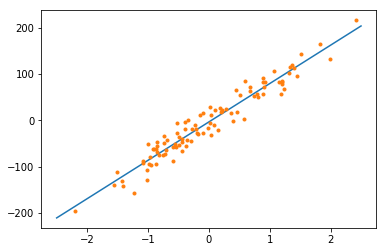

In [26]:
plt.plot(Xgrid, ypgrid_sm)
plt.plot(X, Y, '.')

## Constructing a model with PyTorch

Constructing a model with PyTorch is based on a design pattern with a fairly repeatable three step process:

- Design your model (including relationships between your variables)
    - Generally done by defining a subclass of torch.nn.Module
- Construct your loss and optimizer
- Train your model using your optimizer and forwards and backwards steps in your model

In [27]:
import torch
print(torch.__version__)

1.1.0


In [28]:
# from https://www.stefanfiott.com/machine-learning/tensors-and-gradients-in-pytorch/
def tensor_properties(t, show_value=True):
    print('Tensor properties:')
    props = [('rank', t.dim()),
             ('shape', t.size()),
             ('data type', t.dtype),
             ('tensor type', t.type())]
    for s,v in props:
        print('\t{0:12}: {1}'.format(s,v))
    if show_value:
        #print('{0:12}: {1}'.format('value',t))
        print("Value:")
        print(t)

In [29]:
import torch
from torch.autograd import Variable

X_data = torch.from_numpy(X).float()
Y_data = torch.from_numpy(Y).float()

tensor_properties(X_data)

Tensor properties:
	rank        : 2
	shape       : torch.Size([100, 1])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[ 0.0323],
        [-0.4372],
        [-0.1404],
        [-0.2894],
        [-1.4305],
        [-0.8611],
        [-0.9591],
        [-0.5282],
        [-0.1801],
        [ 1.8189],
        [-1.5016],
        [ 1.0752],
        [-0.5376],
        [-0.3365],
        [-0.6933],
        [ 0.1861],
        [-0.3529],
        [-0.5957],
        [-0.9528],
        [ 1.3721],
        [-1.0015],
        [ 0.5941],
        [ 1.9889],
        [-0.8476],
        [ 0.2128],
        [-0.8635],
        [-0.4457],
        [-1.0867],
        [ 0.8858],
        [-0.3946],
        [-0.7581],
        [ 0.2145],
        [-0.9177],
        [ 1.1819],
        [-1.2346],
        [ 1.5103],
        [ 0.3691],
        [ 0.0780],
        [ 0.9283],
        [ 0.9118],
        [ 0.5054],
        [ 0.3948],
        [-1.4073],
        [ 1.3368],
        [ 0.2891],
    

In [30]:
tensor_properties(Y_data)

Tensor properties:
	rank        : 2
	shape       : torch.Size([100, 1])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[  11.5349],
        [ -66.7810],
        [  11.5418],
        [ -45.4606],
        [-130.5752],
        [ -61.8035],
        [ -78.8241],
        [  -5.5203],
        [ -30.2189],
        [ 165.5526],
        [-112.6469],
        [ 106.9016],
        [ -58.1097],
        [   0.9378],
        [ -43.6143],
        [  26.9573],
        [ -42.6695],
        [ -57.1356],
        [ -95.7962],
        [ 118.3521],
        [ -51.4373],
        [  84.1988],
        [ 131.2178],
        [ -46.2952],
        [  21.0677],
        [ -94.2487],
        [ -40.4418],
        [ -88.6031],
        [  55.9274],
        [  -3.3100],
        [ -74.7845],
        [  20.5148],
        [ -62.6764],
        [  56.0346],
        [-157.7788],
        [ 143.0831],
        [  15.3389],
        [  -9.5979],
        [  81.7474],
        [  71.3214],
        [  53.8740]

In [31]:
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [32]:
# our model
model = Model()

In [33]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the 
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
accum = []
for epoch in range(400):
    
    # Forward pass: Compute predicted y by passing x to the modela
    
    optimizer.zero_grad()
    
    Y_pred = model.forward(X_data)

    # Compute and print loss
    loss = criterion(Y_pred, Y_data)
    accum.append(loss.item())
    #print(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    
    loss.backward()
    optimizer.step()

In [34]:
# After training
Xgrid_data = torch.from_numpy(Xgrid).float()
Ypgrid_pytorch = model.forward(Xgrid_data)

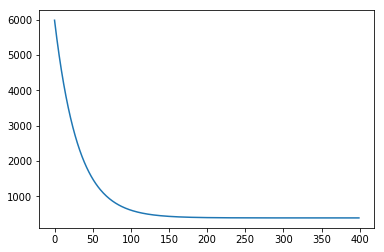

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(accum)

In [37]:
list(model.named_parameters())

[('linear.weight', Parameter containing:
  tensor([[82.7726]], requires_grad=True)),
 ('linear.bias', Parameter containing:
  tensor([-3.7213], requires_grad=True))]

In [38]:
coef

array(80.88336208)

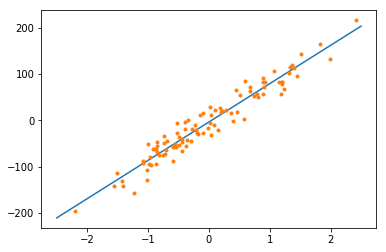

In [39]:
plt.plot(Xgrid, Ypgrid_pytorch.detach().numpy())
plt.plot(X, Y, '.')